#### MNIST Fashion

umu-id: anth2786

The code is based on code from:

    - Jeff Heaton: https://github.com/jeffheaton/t81_558_deep_learning/blob/master/t81_558_class_06_2_cnn.ipynb
    
    - Aurélien Géron, Hands-On Machine Learning with Scikit-Learn, Keras & Tensorflow, 2019
    
    - https://stackoverflow.com/questions/54589669/confusion-matrix-error-classification-metrics-cant-handle-a-mix-of-multilabel regarding getting the confusion matrix working

In [1]:
import tensorflow as tf
print('Tensorflow version:', tf.__version__)

import tensorflow.keras
print('Keras version:', tensorflow.keras.__version__)

# Import Early stopping which stops traing whan a monitored metric has been reached
from tensorflow.keras.callbacks import EarlyStopping
# Import Dense, which is a "normal" NN layer with the function output = activation(dot(input, kernel) + bias)
from tensorflow.keras.layers import Dense
# Import Dropout. Dropout prvents overfitting by applying 0 as input units randomly, during trainng (only training)
from tensorflow.keras.layers import Dropout
# Import Regularizers. Makes it possible to apply penalties on activity, bias or kernel. It is applied per layer
from tensorflow.keras import regularizers




Tensorflow version: 2.3.1
Keras version: 2.4.0


In [2]:
# Import the Fashoin MNIST dataset, which is part of Keras
from tensorflow.keras.datasets import fashion_mnist

# Get the data from the Keras Database
(x_train0, y_train0), (x_test, y_test) = fashion_mnist.load_data()
#(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()


#### Split the training data into traning and validation

In [3]:
import sklearn
# import a method to split traning data into two parts; training and validation data
from sklearn.model_selection import train_test_split

# Split the training set into a trainng and a validation set (15% validation)
x_train, x_val, y_train, y_val = train_test_split(x_train0, y_train0, test_size = 0.15)

#train_no,x,y = x_train.shape
#test_no,x,y = x_test.shape
#val_no,x,y = x_val.shape

#if (len(y_train) != len(x_train)) : print('Number of training labels do not match the data')
#if (len(y_test) != len(x_test)) : print('Number of test labels do not match the data')
#if (len(y_val) != len(x_val)) : print('Number of validation labels do not match the data')

# Print the shapes of the data
print("Shape of x_train: {}".format(x_train.shape))
print("Shape of y_train (Labels): {}".format(y_train.shape))
print("Labels: {}".format(y_train))
print()
print("Shape of x_val: {}".format(x_val.shape))
print("Shape of y_val (Labels): {}".format(y_val.shape))
print("Labels: {}".format(y_val))
print()
print("Shape of x_test: {}".format(x_test.shape))
print("Shape of y_test (Labels): {}".format(y_test.shape))
print("Labels: {}".format(y_test))
print()



Shape of x_train: (51000, 28, 28)
Shape of y_train (Labels): (51000,)
Labels: [7 7 5 ... 7 5 2]

Shape of x_val: (9000, 28, 28)
Shape of y_val (Labels): (9000,)
Labels: [1 0 3 ... 1 3 0]

Shape of x_test: (10000, 28, 28)
Shape of y_test (Labels): (10000,)
Labels: [9 2 1 ... 8 1 5]



#### Display the Apparel as text

In [8]:
# Display as text with the help of Pandas
from IPython.display import display
import pandas as pd

# Choose an image to display, from the training set
image_number = 0
single = x_train[image_number]

# Print which number and the shape of it
print("Image number: ".format(image_number))
print("Shape for single: {}".format(single.shape))

# Print the values of each pixel from the image
pd.set_option('display.max_columns', 27)
pd.set_option('display.max_rows', 27)
pd.DataFrame(single.reshape(28,28))

Image number: 
Shape for single: (28, 28)


,0,1,2,3,4,5,6,7,8,9,10,11,12,...,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0
24,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0
25,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0
26,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0


#### Display the Apparel

Image (#0): Which is labeled '7'


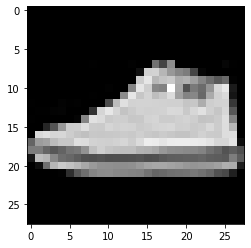

In [9]:
# Display as image with the help of matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Choose an image from the train set (the same as above)
a = x_train[image_number]

# convert the image data to a picture
plt.imshow(a, cmap='gray', interpolation='nearest')

# Print it
print("Image (#{}): Which is labeled '{}'".format(image_number,y_train[image_number]))

#### Display a random set of images

<Figure size 432x288 with 0 Axes>

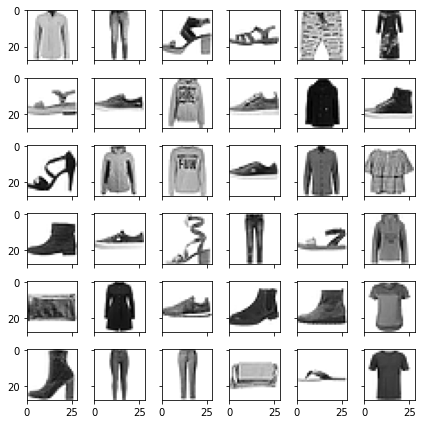

In [10]:
import random

# Choose the images at random 
ROWS = 6
random_indices = random.sample(range(x_train.shape[0]), ROWS*ROWS)

# Extract the images and put them into a matrix sample_images
sample_images = x_train[random_indices, :]

# Clear the current matplotlib figure
plt.clf()

# Make small axes for the images
fig, axes = plt.subplots(ROWS,ROWS, 
                         figsize=(ROWS,ROWS),
                         sharex=True, sharey=True) 

# Plot the images in a matrix ROWS x ROWS
for i in range(ROWS*ROWS):
    subplot_row = i//ROWS 
    subplot_col = i%ROWS

    # plot the subaxes'
    ax = axes[subplot_row, subplot_col]

    # Pick the image in the row
    plottable_image = np.reshape(sample_images[i,:], (28,28))
    
    # Make an image
    ax.imshow(plottable_image, cmap='gray_r')
    
    # Set the numerical bounds of the x-axis
    ax.set_xbound([0,28])

# plot it to the webpage
plt.tight_layout()
plt.show()

#### Training/Fitting CNN -Fashion

In [11]:
# Use Keras that come with Tensorflow and that is not compatible with other Keras backends
import tensorflow.keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K

# Define the number of classes in MNIST Fashion
num_classes = 10

# Define the image dimensions
img_rows, img_cols = 28, 28

# Change the data depending on if the images are using standard format with channels (color 
#    definition) last, or if it is defined first in the image definition

if K.image_data_format() == 'channels_first':
    # It is first, reshape the sets
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    # It is last, reshape the sets
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
    
# Define the image sets explicitly as float32
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Scale the image values to a range 0-1, which will make it work for Gradiend Descend
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print("Training samples: {}".format(x_train.shape[0]))
print("Test samples: {}".format(x_test.shape[0]))

# Convert class vectors to binary class matrices
#  It converts the labels vector to a matrix/numpy array that has columns equal to the number of categories
y_train = tensorflow.keras.utils.to_categorical(y_train, num_classes)
y_test = tensorflow.keras.utils.to_categorical(y_test, num_classes)

# Start defining the Keras model to use:
model = Sequential()
# The Keras model will be the simples Keras model for NN networks. It is a single 
#    stack of layers connected sequentially

# Add a convolution layer
#   32 output filters
#   activation function, relu = Rectified Linear Unit
#   the convolution window height and width (used for a matrix operations to get 
#   more information from the data). It is used to find small specifics of a picture. 
#   eg an arc or a corner. It is computational expensive.
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))

# Add another convolution layer (that acts on the first layer)
#   64 output filters
#   Activation = relu
#   the convolution window 3,3
model.add(Conv2D(64, (3, 3), activation='relu'))

# Define pooling layer. This will subsample (shrink) the images to reduce memory usage and cpu load
#   It also limits the risk of overfitting as the number of parameters goes down
#   As strides is not defined it is defaulting to the pool_size
#   Padding is not defined. Default to ?? ("valid" = no padding or "same" = padding evenly from input)
model.add(MaxPooling2D(pool_size=(2, 2)))

# Define Dropout parameter. Dropout temporarliy remove neuron/units in the network during
#    a minibatch forward operations or an Epoc. It is done to reduce the risk of overfitting
#    This uses a 25% probability dropout rate
model.add(Dropout(0.25))

# Flatten the input. This prepares the vector for fully connected layers. Usually used in CNN models
model.add(Flatten())

# Add a hidden Dense layer
#   Activation = relu
#   Dimension of the output space = 128
model.add(Dense(128, activation='relu'))

# Define Dropout parameter. Dropout temporarliy remove neuron/units in the network during
#    a minibatch forward operations or an Epoc. It is done to reduce the risk of overfitting
#    This uses a 25% probability dropout rate
model.add(Dropout(0.5))

# Add a an output layer. The output space is the number of classes
#    Softmax maxe the output as probablity matrix of the different classes
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam',
              metrics=['accuracy'])

x_train shape: (51000, 28, 28, 1)
Training samples: 51000
Test samples: 10000


In [12]:
# Nicely formatted time string
def hms_string(sec_elapsed):
    h = int(sec_elapsed / (60 * 60))
    m = int((sec_elapsed % (60 * 60)) / 60)
    s = sec_elapsed % 60
    return f"{h}:{m:>02}:{s:>05.2f}"

In [16]:
import tensorflow as tf
import time

# Define the number of Epochs to be run. An Epoc is the full training cycle consisting of 
#   a Forward pass, Measurement of the network's output errors, the computation of all the 
#   output connectoin contribution to the error by aplying the chain rule, then the same but
#   for all the layers. Again with the chain rule, and finally in the Epoc the weights are 
#   calculated and adjusted using eg Gradiant descend or the hyperbolic tangent function.
#epochs = 2
epochs = 12

# Define the number of samples that will pass through the network at one time. There are papers
#   showing that you shouldn't use batch sized largen than 32, and other papers that argue for 
#   as large batch sizes as the GPU can handle memory wise.
#   With a train set of 51 000 images, it will take 399 batches to make 1 Epoc when the 
#   batch_size is 128
batch_size = 128


start_time = time.time()

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=2,
          validation_split=0.1)



elapsed_time = time.time() - start_time
print("Elapsed time: {}".format(hms_string(elapsed_time)))

Epoch 1/12
359/359 - 35s - loss: 0.2586 - accuracy: 0.9056 - val_loss: 0.2334 - val_accuracy: 0.9143
Epoch 2/12
359/359 - 35s - loss: 0.2337 - accuracy: 0.9150 - val_loss: 0.2304 - val_accuracy: 0.9157
Epoch 3/12
359/359 - 35s - loss: 0.2216 - accuracy: 0.9182 - val_loss: 0.2194 - val_accuracy: 0.9204
Epoch 4/12
359/359 - 35s - loss: 0.2018 - accuracy: 0.9256 - val_loss: 0.2083 - val_accuracy: 0.9241
Epoch 5/12
359/359 - 35s - loss: 0.1926 - accuracy: 0.9276 - val_loss: 0.2080 - val_accuracy: 0.9241
Epoch 6/12
359/359 - 35s - loss: 0.1777 - accuracy: 0.9334 - val_loss: 0.2116 - val_accuracy: 0.9275
Epoch 7/12
359/359 - 35s - loss: 0.1674 - accuracy: 0.9389 - val_loss: 0.2038 - val_accuracy: 0.9271
Epoch 8/12
359/359 - 35s - loss: 0.1538 - accuracy: 0.9424 - val_loss: 0.2018 - val_accuracy: 0.9288
Epoch 9/12
359/359 - 35s - loss: 0.1486 - accuracy: 0.9434 - val_loss: 0.2119 - val_accuracy: 0.9296
Epoch 10/12
359/359 - 35s - loss: 0.1362 - accuracy: 0.9500 - val_loss: 0.2183 - val_accura

#### Model evaluation

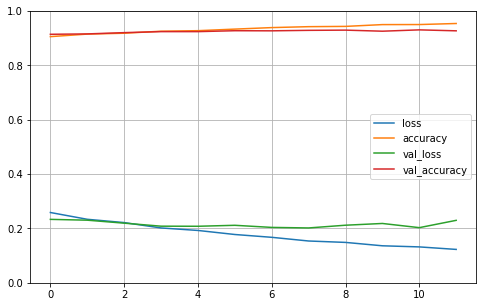

In [18]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [19]:
start_time = time.time()

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss: {}'.format(score[0]))
print('Test accuracy: {}'.format(score[1]))

elapsed_time = time.time() - start_time
print("Elapsed time: {}".format(hms_string(elapsed_time)))

Test loss: 0.256626158952713
Test accuracy: 0.916700005531311
Elapsed time: 0:00:01.72


#### MODEL A1: Different parameters - Change of batch_size 32

In [21]:
batch_size2 = 32

# 
model2 = Sequential()
model2.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model2.add(Conv2D(64, (3, 3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))
model2.add(Flatten())
model2.add(Dense(128, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(num_classes, activation='softmax'))
model2.compile(loss='categorical_crossentropy', optimizer='adam',
              metrics=['accuracy'])

In [22]:
start_time = time.time()
history2 = model2.fit(x_train, y_train,
          batch_size=batch_size2,
          epochs=epochs,
          verbose=2,
          validation_split=0.1)



elapsed_time = time.time() - start_time
print("Elapsed time: {}".format(hms_string(elapsed_time)))

Epoch 1/12
1435/1435 - 54s - loss: 0.5108 - accuracy: 0.8188 - val_loss: 0.2915 - val_accuracy: 0.8929
Epoch 2/12
1435/1435 - 54s - loss: 0.3372 - accuracy: 0.8775 - val_loss: 0.2632 - val_accuracy: 0.9053
Epoch 3/12
1435/1435 - 53s - loss: 0.2886 - accuracy: 0.8949 - val_loss: 0.2448 - val_accuracy: 0.9094
Epoch 4/12
1435/1435 - 53s - loss: 0.2578 - accuracy: 0.9071 - val_loss: 0.2284 - val_accuracy: 0.9159
Epoch 5/12
1435/1435 - 53s - loss: 0.2321 - accuracy: 0.9148 - val_loss: 0.2235 - val_accuracy: 0.9208
Epoch 6/12
1435/1435 - 53s - loss: 0.2127 - accuracy: 0.9224 - val_loss: 0.2196 - val_accuracy: 0.9214
Epoch 7/12
1435/1435 - 54s - loss: 0.1954 - accuracy: 0.9265 - val_loss: 0.2100 - val_accuracy: 0.9249
Epoch 8/12
1435/1435 - 54s - loss: 0.1821 - accuracy: 0.9330 - val_loss: 0.2267 - val_accuracy: 0.9253
Epoch 9/12
1435/1435 - 54s - loss: 0.1701 - accuracy: 0.9363 - val_loss: 0.2413 - val_accuracy: 0.9194
Epoch 10/12
1435/1435 - 54s - loss: 0.1621 - accuracy: 0.9395 - val_loss:

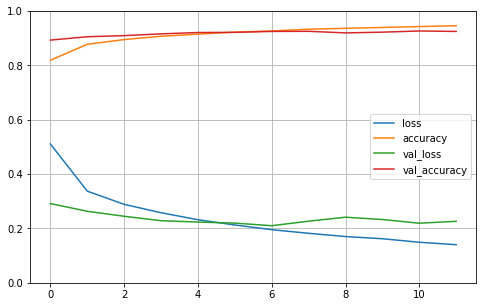

In [23]:
pd.DataFrame(history2.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [24]:
start_time = time.time()

score = model2.evaluate(x_test, y_test, verbose=0)
print('Test loss: {}'.format(score[0]))
print('Test accuracy: {}'.format(score[1]))

elapsed_time = time.time() - start_time
print("Elapsed time: {}".format(hms_string(elapsed_time)))

Test loss: 0.24496199190616608
Test accuracy: 0.9215999841690063
Elapsed time: 0:00:01.73


#### MODEL A2: Different parameters - Change of batch_size 512

In [26]:
batch_size3 = 512

# 
model3 = Sequential()
model3.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model3.add(Conv2D(64, (3, 3), activation='relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(0.25))
model3.add(Flatten())
model3.add(Dense(128, activation='relu'))
model3.add(Dropout(0.5))
model3.add(Dense(num_classes, activation='softmax'))
model3.compile(loss='categorical_crossentropy', optimizer='adam',
              metrics=['accuracy'])

In [27]:
start_time = time.time()
history3 = model3.fit(x_train, y_train,
          batch_size=batch_size3,
          epochs=epochs,
          verbose=2,
          validation_split=0.1)



elapsed_time = time.time() - start_time
print("Elapsed time: {}".format(hms_string(elapsed_time)))

Epoch 1/12
90/90 - 33s - loss: 0.7427 - accuracy: 0.7337 - val_loss: 0.4040 - val_accuracy: 0.8531
Epoch 2/12
90/90 - 32s - loss: 0.4342 - accuracy: 0.8473 - val_loss: 0.3128 - val_accuracy: 0.8859
Epoch 3/12
90/90 - 32s - loss: 0.3651 - accuracy: 0.8711 - val_loss: 0.2832 - val_accuracy: 0.8957
Epoch 4/12
90/90 - 33s - loss: 0.3305 - accuracy: 0.8824 - val_loss: 0.2653 - val_accuracy: 0.9033
Epoch 5/12
90/90 - 32s - loss: 0.3058 - accuracy: 0.8900 - val_loss: 0.2514 - val_accuracy: 0.9086
Epoch 6/12
90/90 - 32s - loss: 0.2844 - accuracy: 0.8992 - val_loss: 0.2455 - val_accuracy: 0.9102
Epoch 7/12
90/90 - 31s - loss: 0.2659 - accuracy: 0.9041 - val_loss: 0.2310 - val_accuracy: 0.9147
Epoch 8/12
90/90 - 30s - loss: 0.2559 - accuracy: 0.9074 - val_loss: 0.2290 - val_accuracy: 0.9151
Epoch 9/12
90/90 - 30s - loss: 0.2411 - accuracy: 0.9123 - val_loss: 0.2186 - val_accuracy: 0.9204
Epoch 10/12
90/90 - 30s - loss: 0.2311 - accuracy: 0.9162 - val_loss: 0.2177 - val_accuracy: 0.9210
Epoch 11/

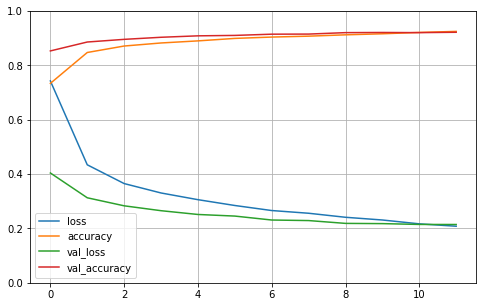

In [28]:
pd.DataFrame(history3.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [29]:
start_time = time.time()

score = model3.evaluate(x_test, y_test, verbose=0)
print('Test loss: {}'.format(score[0]))
print('Test accuracy: {}'.format(score[1]))

elapsed_time = time.time() - start_time
print("Elapsed time: {}".format(hms_string(elapsed_time)))

Test loss: 0.2366991937160492
Test accuracy: 0.9142000079154968
Elapsed time: 0:00:01.72


#### MODEL B1: Different parameters - Change of strides (2,2)

In [30]:
# 
model4 = Sequential()
model4.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model4.add(Conv2D(64, (3, 3), activation='relu'))
model4.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
model4.add(Dropout(0.25))
model4.add(Flatten())
model4.add(Dense(128, activation='relu'))
model4.add(Dropout(0.5))
model4.add(Dense(num_classes, activation='softmax'))
model4.compile(loss='categorical_crossentropy', optimizer='adam',
              metrics=['accuracy'])

In [31]:
start_time = time.time()
history4 = model4.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=2,
          validation_split=0.1)



elapsed_time = time.time() - start_time
print("Elapsed time: {}".format(hms_string(elapsed_time)))

Epoch 1/12
359/359 - 36s - loss: 0.5727 - accuracy: 0.7990 - val_loss: 0.3261 - val_accuracy: 0.8835
Epoch 2/12
359/359 - 36s - loss: 0.3677 - accuracy: 0.8682 - val_loss: 0.2784 - val_accuracy: 0.8945
Epoch 3/12
359/359 - 36s - loss: 0.3187 - accuracy: 0.8842 - val_loss: 0.2559 - val_accuracy: 0.9039
Epoch 4/12
359/359 - 36s - loss: 0.2857 - accuracy: 0.8956 - val_loss: 0.2389 - val_accuracy: 0.9149
Epoch 5/12
359/359 - 36s - loss: 0.2608 - accuracy: 0.9057 - val_loss: 0.2298 - val_accuracy: 0.9171
Epoch 6/12
359/359 - 36s - loss: 0.2385 - accuracy: 0.9137 - val_loss: 0.2263 - val_accuracy: 0.9171
Epoch 7/12
359/359 - 36s - loss: 0.2204 - accuracy: 0.9182 - val_loss: 0.2200 - val_accuracy: 0.9192
Epoch 8/12
359/359 - 36s - loss: 0.2061 - accuracy: 0.9234 - val_loss: 0.2186 - val_accuracy: 0.9204
Epoch 9/12
359/359 - 36s - loss: 0.1925 - accuracy: 0.9296 - val_loss: 0.2184 - val_accuracy: 0.9206
Epoch 10/12
359/359 - 36s - loss: 0.1809 - accuracy: 0.9337 - val_loss: 0.2121 - val_accura

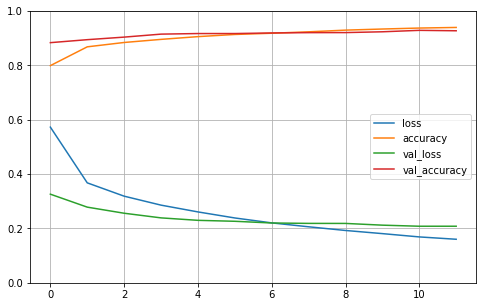

In [32]:
pd.DataFrame(history4.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [33]:
start_time = time.time()

score = model4.evaluate(x_test, y_test, verbose=0)
print('Test loss: {}'.format(score[0]))
print('Test accuracy: {}'.format(score[1]))

elapsed_time = time.time() - start_time
print("Elapsed time: {}".format(hms_string(elapsed_time)))

Test loss: 0.22433337569236755
Test accuracy: 0.9228000044822693
Elapsed time: 0:00:01.68


#### MODEL B2: Different parameters - Change of strides (4,4)

In [34]:
# 
model5 = Sequential()
model5.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model5.add(Conv2D(64, (3, 3), activation='relu'))
model5.add(MaxPooling2D(pool_size=(2, 2), strides=(4,4)))
model5.add(Dropout(0.25))
model5.add(Flatten())
model5.add(Dense(128, activation='relu'))
model5.add(Dropout(0.5))
model5.add(Dense(num_classes, activation='softmax'))
model5.compile(loss='categorical_crossentropy', optimizer='adam',
              metrics=['accuracy'])

In [35]:
start_time = time.time()
history5 = model5.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=2,
          validation_split=0.1)



elapsed_time = time.time() - start_time
print("Elapsed time: {}".format(hms_string(elapsed_time)))

Epoch 1/12
359/359 - 30s - loss: 0.6472 - accuracy: 0.7669 - val_loss: 0.3859 - val_accuracy: 0.8576
Epoch 2/12
359/359 - 30s - loss: 0.4336 - accuracy: 0.8441 - val_loss: 0.3194 - val_accuracy: 0.8833
Epoch 3/12
359/359 - 30s - loss: 0.3793 - accuracy: 0.8624 - val_loss: 0.2949 - val_accuracy: 0.8875
Epoch 4/12
359/359 - 30s - loss: 0.3469 - accuracy: 0.8746 - val_loss: 0.2750 - val_accuracy: 0.9006
Epoch 5/12
359/359 - 30s - loss: 0.3288 - accuracy: 0.8815 - val_loss: 0.2629 - val_accuracy: 0.9029
Epoch 6/12
359/359 - 30s - loss: 0.3100 - accuracy: 0.8875 - val_loss: 0.2546 - val_accuracy: 0.9057
Epoch 7/12
359/359 - 30s - loss: 0.2949 - accuracy: 0.8931 - val_loss: 0.2567 - val_accuracy: 0.9027
Epoch 8/12
359/359 - 30s - loss: 0.2797 - accuracy: 0.8978 - val_loss: 0.2375 - val_accuracy: 0.9100
Epoch 9/12
359/359 - 30s - loss: 0.2647 - accuracy: 0.9014 - val_loss: 0.2445 - val_accuracy: 0.9031
Epoch 10/12
359/359 - 30s - loss: 0.2547 - accuracy: 0.9056 - val_loss: 0.2428 - val_accura

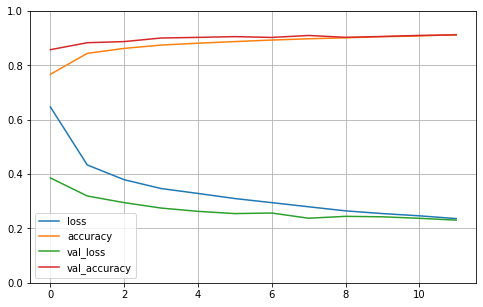

In [36]:
pd.DataFrame(history5.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [37]:
start_time = time.time()

score = model5.evaluate(x_test, y_test, verbose=0)
print('Test loss: {}'.format(score[0]))
print('Test accuracy: {}'.format(score[1]))

elapsed_time = time.time() - start_time
print("Elapsed time: {}".format(hms_string(elapsed_time)))

Test loss: 0.26243045926094055
Test accuracy: 0.9075999855995178
Elapsed time: 0:00:01.48


#### MODEL C1: Different parameters - Extra hidden layer with 64 output (and dropout)

In [38]:
# 
model6 = Sequential()
model6.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model6.add(Conv2D(64, (3, 3), activation='relu'))
model6.add(MaxPooling2D(pool_size=(2, 2)))
model6.add(Dropout(0.25))
model6.add(Flatten())
model6.add(Dense(128, activation='relu'))
model6.add(Dropout(0.5))

# Extra layer
model6.add(Dense(64, activation='relu'))
model6.add(Dropout(0.5))

model6.add(Dense(num_classes, activation='softmax'))
model6.compile(loss='categorical_crossentropy', optimizer='adam',
              metrics=['accuracy'])

In [39]:
start_time = time.time()
history6 = model6.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=2,
          validation_split=0.1)



elapsed_time = time.time() - start_time
print("Elapsed time: {}".format(hms_string(elapsed_time)))

Epoch 1/12
359/359 - 36s - loss: 0.8159 - accuracy: 0.7132 - val_loss: 0.3982 - val_accuracy: 0.8559
Epoch 2/12
359/359 - 36s - loss: 0.4742 - accuracy: 0.8386 - val_loss: 0.3111 - val_accuracy: 0.8857
Epoch 3/12
359/359 - 36s - loss: 0.3995 - accuracy: 0.8635 - val_loss: 0.2828 - val_accuracy: 0.8969
Epoch 4/12
359/359 - 36s - loss: 0.3577 - accuracy: 0.8793 - val_loss: 0.2562 - val_accuracy: 0.9078
Epoch 5/12
359/359 - 36s - loss: 0.3323 - accuracy: 0.8877 - val_loss: 0.2513 - val_accuracy: 0.9100
Epoch 6/12
359/359 - 36s - loss: 0.3033 - accuracy: 0.8973 - val_loss: 0.2500 - val_accuracy: 0.9088
Epoch 7/12
359/359 - 36s - loss: 0.2825 - accuracy: 0.9032 - val_loss: 0.2425 - val_accuracy: 0.9112
Epoch 8/12
359/359 - 35s - loss: 0.2703 - accuracy: 0.9069 - val_loss: 0.2270 - val_accuracy: 0.9204
Epoch 9/12
359/359 - 35s - loss: 0.2544 - accuracy: 0.9112 - val_loss: 0.2215 - val_accuracy: 0.9196
Epoch 10/12
359/359 - 36s - loss: 0.2406 - accuracy: 0.9178 - val_loss: 0.2230 - val_accura

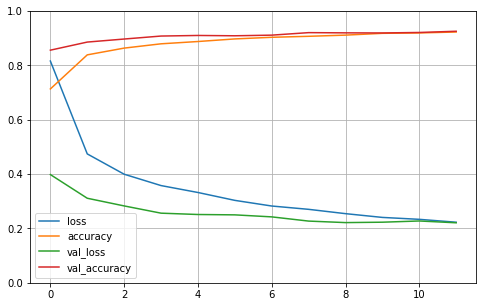

In [40]:
pd.DataFrame(history6.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [41]:
start_time = time.time()

score = model6.evaluate(x_test, y_test, verbose=0)
print('Test loss: {}'.format(score[0]))
print('Test accuracy: {}'.format(score[1]))

elapsed_time = time.time() - start_time
print("Elapsed time: {}".format(hms_string(elapsed_time)))

Test loss: 0.2432556450366974
Test accuracy: 0.9186999797821045
Elapsed time: 0:00:01.72


#### MODEL D1: Different parameters - Extra Convolution layer

In [43]:
# 
model7 = Sequential()
model7.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model7.add(Conv2D(64, (3, 3), activation='relu'))
model7.add(MaxPooling2D(pool_size=(2, 2)))

# Extra conolution layer
model7.add(Conv2D(256, (3, 3), activation='relu'))
model7.add(Conv2D(256, (3, 3), activation='relu'))
model7.add(MaxPooling2D(pool_size=(2, 2)))


model7.add(Dropout(0.25))
model7.add(Flatten())
model7.add(Dense(128, activation='relu'))
model7.add(Dropout(0.5))
model7.add(Dense(num_classes, activation='softmax'))
model7.compile(loss='categorical_crossentropy', optimizer='adam',
              metrics=['accuracy'])

In [44]:
start_time = time.time()
history7 = model7.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=2,
          validation_split=0.1)



elapsed_time = time.time() - start_time
print("Elapsed time: {}".format(hms_string(elapsed_time)))

Epoch 1/12
359/359 - 81s - loss: 0.6733 - accuracy: 0.7558 - val_loss: 0.3787 - val_accuracy: 0.8637
Epoch 2/12
359/359 - 82s - loss: 0.4085 - accuracy: 0.8530 - val_loss: 0.2962 - val_accuracy: 0.8867
Epoch 3/12
359/359 - 82s - loss: 0.3334 - accuracy: 0.8812 - val_loss: 0.2621 - val_accuracy: 0.9065
Epoch 4/12
359/359 - 82s - loss: 0.2962 - accuracy: 0.8930 - val_loss: 0.2535 - val_accuracy: 0.9092
Epoch 5/12
359/359 - 81s - loss: 0.2686 - accuracy: 0.9034 - val_loss: 0.2329 - val_accuracy: 0.9127
Epoch 6/12
359/359 - 82s - loss: 0.2476 - accuracy: 0.9107 - val_loss: 0.2250 - val_accuracy: 0.9171
Epoch 7/12
359/359 - 81s - loss: 0.2258 - accuracy: 0.9184 - val_loss: 0.2089 - val_accuracy: 0.9200
Epoch 8/12
359/359 - 81s - loss: 0.2076 - accuracy: 0.9244 - val_loss: 0.2150 - val_accuracy: 0.9220
Epoch 9/12
359/359 - 82s - loss: 0.1964 - accuracy: 0.9278 - val_loss: 0.2074 - val_accuracy: 0.9241
Epoch 10/12
359/359 - 82s - loss: 0.1749 - accuracy: 0.9350 - val_loss: 0.2076 - val_accura

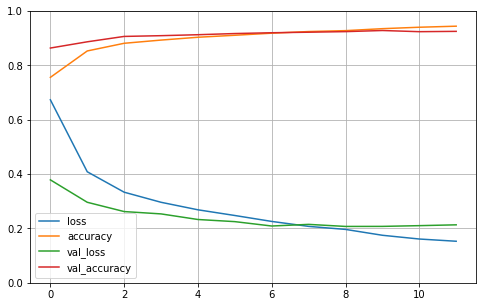

In [45]:
pd.DataFrame(history7.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [47]:
start_time = time.time()

score = model7.evaluate(x_test, y_test, verbose=0)
print('Test loss: {}'.format(score[0]))
print('Test accuracy: {}'.format(score[1]))

elapsed_time = time.time() - start_time
print("Elapsed time: {}".format(hms_string(elapsed_time)))

Test loss: 0.231080561876297
Test accuracy: 0.9199000000953674
Elapsed time: 0:00:04.39


###### Discussion

Main model:<br>
    Test loss: 0.256626158952713 = ca 0,257<br>
    Test accuracy: 0.916700005531311 = ca 0,917<br>

A1 - Batch_size = 32 instead of 128<br>
    Test loss: 0.24496199190616608 = ca 0,245<br>
    Test accuracy: 0.9215999841690063 =  ca 0,921<br>
A2 - Batch_size = 32 instead of 512<br>
    Test loss: 0.2366991937160492 = ca 0,237<br>
    Test accuracy: 0.9142000079154968 = ca 0,914<br>

Batch_size = 128 gives a much higher loss in the beginning of the Epochs compared to the main model.<br>
The model will end up in the same region when it comes to test loss and test accuracy compared to the main model.<br>
The test and validation accuracy harmonizes after 4 epochs<br>

Batch_size = 512 gives even higher loss in the beginning. Also the Validation accuracy is lower. The model will end up in the same region when it comes to test loss and test accuracy compared to the main model.<br>
The test and validation accuracy harmonizes after 6 epochs<br>

Main model took 7:01 minutes to run<br>
A1 took 10:43 minutes<br>
A2 took 06:25 minutes<br>
Larger batch sizes was expected to go faster on a GPU, however, this has been run in the CPU. <br>

Beck to batch size 32<br>

B1 - Stride 2,2<br>
    Test loss: 0.22433337569236755 = ca 0,224<br>
    Test accuracy: 0.9228000044822693 = ca 0,923<br>
B2 - Stride 4,4<br>
    Test loss: 0.26243045926094055 = ca 0,262<br>
    Test accuracy: 0.9075999855995178 = ca 0,908<br>
    
A stride of 2,2 gives a better result. Higher Accuracy and lower test loss, a stride of 4,4 however gives worse performance (0,262 and 0,908 resp)


C1 - Extra hidden layer with 64 output (and dropout)<br>
    Test loss: 0.2432556450366974 = ca 0,243<br>
    Test accuracy: 0.9186999797821045 = ca 0,919<br>
    
Adding an extra hidden layer gives approximate the same accuracy, but slightly better loss. 

D1 -  Extra Convolution layer<br>
    Test loss: 0.231080561876297 = ca 0,231<br>
    Test accuracy: 0.9199000000953674 = ca 0,920<br>

Adding an extra convolution layer made the loss slightly better, but no big difference to the accuracy

## VG Part

In [48]:
#epochs = 2
epochs = 12


#### Run 1

In [52]:
batch_size2 = 32

# 
model8a = Sequential()
model8a.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model8a.add(Conv2D(64, (3, 3), activation='relu'))
model8a.add(MaxPooling2D(pool_size=(2, 2)))
model8a.add(Dropout(0.25))
model8a.add(Flatten())
model8a.add(Dense(128, activation='relu'))
model8a.add(Dropout(0.5))
model8a.add(Dense(num_classes, activation='softmax'))
model8a.compile(loss='categorical_crossentropy', optimizer='adam',
              metrics=['accuracy'])

In [53]:
start_time = time.time()
history8a = model8a.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=2,
          validation_split=0.1)



elapsed_time = time.time() - start_time
print("Elapsed time: {}".format(hms_string(elapsed_time)))

Epoch 1/12
359/359 - 36s - loss: 0.5782 - accuracy: 0.7969 - val_loss: 0.3317 - val_accuracy: 0.8812
Epoch 2/12
359/359 - 34s - loss: 0.3773 - accuracy: 0.8648 - val_loss: 0.2805 - val_accuracy: 0.8971
Epoch 3/12
359/359 - 34s - loss: 0.3217 - accuracy: 0.8842 - val_loss: 0.2580 - val_accuracy: 0.9069
Epoch 4/12
359/359 - 34s - loss: 0.2839 - accuracy: 0.8985 - val_loss: 0.2437 - val_accuracy: 0.9116
Epoch 5/12
359/359 - 34s - loss: 0.2629 - accuracy: 0.9051 - val_loss: 0.2317 - val_accuracy: 0.9141
Epoch 6/12
359/359 - 34s - loss: 0.2422 - accuracy: 0.9113 - val_loss: 0.2350 - val_accuracy: 0.9116
Epoch 7/12
359/359 - 34s - loss: 0.2198 - accuracy: 0.9177 - val_loss: 0.2199 - val_accuracy: 0.9212
Epoch 8/12
359/359 - 34s - loss: 0.2069 - accuracy: 0.9232 - val_loss: 0.2063 - val_accuracy: 0.9239
Epoch 9/12
359/359 - 34s - loss: 0.1918 - accuracy: 0.9285 - val_loss: 0.2078 - val_accuracy: 0.9216
Epoch 10/12
359/359 - 34s - loss: 0.1825 - accuracy: 0.9323 - val_loss: 0.2047 - val_accura

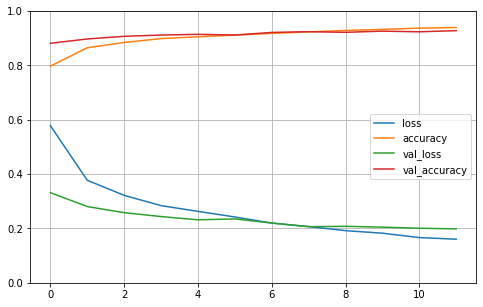

In [54]:
pd.DataFrame(history8a.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [55]:
start_time = time.time()

score = model8a.evaluate(x_test, y_test, verbose=0)
print('Test loss: {}'.format(score[0]))
print('Test accuracy: {}'.format(score[1]))

elapsed_time = time.time() - start_time
print("Elapsed time: {}".format(hms_string(elapsed_time)))

Test loss: 0.2311367690563202
Test accuracy: 0.9208999872207642
Elapsed time: 0:00:01.63


#### Run 2

In [56]:
start_time = time.time()
history9 = model8a.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=2,
          validation_split=0.1)



elapsed_time = time.time() - start_time
print("Elapsed time: {}".format(hms_string(elapsed_time)))

Epoch 1/12
359/359 - 34s - loss: 0.1477 - accuracy: 0.9443 - val_loss: 0.2153 - val_accuracy: 0.9265
Epoch 2/12
359/359 - 34s - loss: 0.1370 - accuracy: 0.9485 - val_loss: 0.2163 - val_accuracy: 0.9251
Epoch 3/12
359/359 - 34s - loss: 0.1275 - accuracy: 0.9524 - val_loss: 0.2164 - val_accuracy: 0.9261
Epoch 4/12
359/359 - 34s - loss: 0.1232 - accuracy: 0.9525 - val_loss: 0.2031 - val_accuracy: 0.9300
Epoch 5/12
359/359 - 34s - loss: 0.1164 - accuracy: 0.9556 - val_loss: 0.2197 - val_accuracy: 0.9239
Epoch 6/12
359/359 - 34s - loss: 0.1119 - accuracy: 0.9572 - val_loss: 0.2341 - val_accuracy: 0.9237
Epoch 7/12
359/359 - 34s - loss: 0.1040 - accuracy: 0.9603 - val_loss: 0.2237 - val_accuracy: 0.9292
Epoch 8/12
359/359 - 34s - loss: 0.1013 - accuracy: 0.9617 - val_loss: 0.2388 - val_accuracy: 0.9261
Epoch 9/12
359/359 - 34s - loss: 0.0954 - accuracy: 0.9637 - val_loss: 0.2309 - val_accuracy: 0.9294
Epoch 10/12
359/359 - 34s - loss: 0.0966 - accuracy: 0.9635 - val_loss: 0.2284 - val_accura

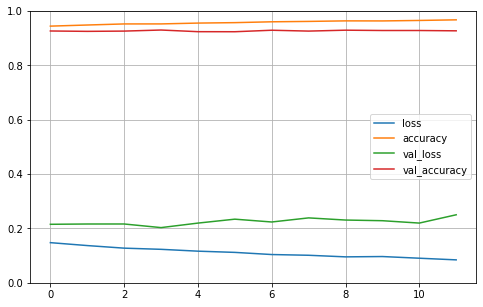

In [57]:
pd.DataFrame(history9.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [58]:
start_time = time.time()

score = model8a.evaluate(x_test, y_test, verbose=0)
print('Test loss: {}'.format(score[0]))
print('Test accuracy: {}'.format(score[1]))

elapsed_time = time.time() - start_time
print("Elapsed time: {}".format(hms_string(elapsed_time)))

Test loss: 0.2872166931629181
Test accuracy: 0.9233999848365784
Elapsed time: 0:00:01.64


#### Run 3

In [59]:
start_time = time.time()
history10 = model8a.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=2,
          validation_split=0.1)



elapsed_time = time.time() - start_time
print("Elapsed time: {}".format(hms_string(elapsed_time)))

Epoch 1/12
359/359 - 34s - loss: 0.0882 - accuracy: 0.9673 - val_loss: 0.2382 - val_accuracy: 0.9333
Epoch 2/12
359/359 - 34s - loss: 0.0805 - accuracy: 0.9685 - val_loss: 0.2431 - val_accuracy: 0.9271
Epoch 3/12
359/359 - 34s - loss: 0.0772 - accuracy: 0.9708 - val_loss: 0.2495 - val_accuracy: 0.9288
Epoch 4/12
359/359 - 34s - loss: 0.0748 - accuracy: 0.9710 - val_loss: 0.2585 - val_accuracy: 0.9282
Epoch 5/12
359/359 - 34s - loss: 0.0747 - accuracy: 0.9710 - val_loss: 0.2612 - val_accuracy: 0.9265
Epoch 6/12
359/359 - 34s - loss: 0.0736 - accuracy: 0.9722 - val_loss: 0.2678 - val_accuracy: 0.9286
Epoch 7/12
359/359 - 34s - loss: 0.0703 - accuracy: 0.9728 - val_loss: 0.2455 - val_accuracy: 0.9322
Epoch 8/12
359/359 - 34s - loss: 0.0711 - accuracy: 0.9717 - val_loss: 0.2580 - val_accuracy: 0.9312
Epoch 9/12
359/359 - 34s - loss: 0.0671 - accuracy: 0.9748 - val_loss: 0.2837 - val_accuracy: 0.9284
Epoch 10/12
359/359 - 34s - loss: 0.0640 - accuracy: 0.9747 - val_loss: 0.2705 - val_accura

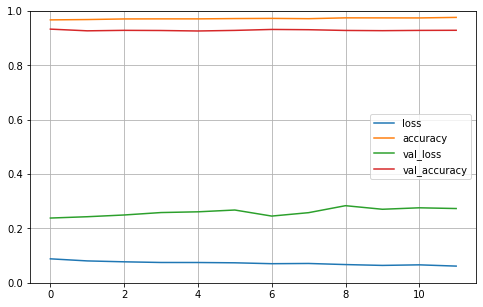

In [60]:
pd.DataFrame(history10.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [61]:
start_time = time.time()

score = model8a.evaluate(x_test, y_test, verbose=0)
print('Test loss: {}'.format(score[0]))
print('Test accuracy: {}'.format(score[1]))

elapsed_time = time.time() - start_time
print("Elapsed time: {}".format(hms_string(elapsed_time)))

Test loss: 0.30686551332473755
Test accuracy: 0.9279999732971191
Elapsed time: 0:00:01.63


##### Comparison

Doing the same training 3 times in a row with Keras, Keras continue where it left of. 
That means that when en Epoc in this example is 12, it does 12x3 = 36. 

The variance between test and validation in both accuracy and loss goes up the more Epocs is done after apporx 9 epoch. The validation loss is significantly higher than the test loss. This is an indication of a big problem. As the validation loss goes up as the test loss continues to go down, and this is a sign of overfitting.

#### Optimizer 1 - Nadam

In [70]:
#epochs = 2
epochs = 12

In [71]:
batch_size2 = 32

# 
model11 = Sequential()
model11.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model11.add(Conv2D(64, (3, 3), activation='relu'))
model11.add(MaxPooling2D(pool_size=(2, 2)))
model11.add(Dropout(0.25))
model11.add(Flatten())
model11.add(Dense(128, activation='relu'))
model11.add(Dropout(0.5))
model11.add(Dense(num_classes, activation='softmax'))
model11.compile(loss='categorical_crossentropy', optimizer='nadam',
              metrics=['accuracy'])

In [72]:
start_time = time.time()
history11 = model11.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=2,
          validation_split=0.1)



elapsed_time = time.time() - start_time
print("Elapsed time: {}".format(hms_string(elapsed_time)))

Epoch 1/12
359/359 - 39s - loss: 0.5634 - accuracy: 0.8028 - val_loss: 0.3196 - val_accuracy: 0.8863
Epoch 2/12
359/359 - 38s - loss: 0.3609 - accuracy: 0.8723 - val_loss: 0.2726 - val_accuracy: 0.9025
Epoch 3/12
359/359 - 38s - loss: 0.3120 - accuracy: 0.8894 - val_loss: 0.2604 - val_accuracy: 0.9033
Epoch 4/12
359/359 - 38s - loss: 0.2715 - accuracy: 0.9018 - val_loss: 0.2626 - val_accuracy: 0.9016
Epoch 5/12
359/359 - 38s - loss: 0.2521 - accuracy: 0.9082 - val_loss: 0.2265 - val_accuracy: 0.9133
Epoch 6/12
359/359 - 39s - loss: 0.2324 - accuracy: 0.9154 - val_loss: 0.2193 - val_accuracy: 0.9186
Epoch 7/12
359/359 - 39s - loss: 0.2126 - accuracy: 0.9216 - val_loss: 0.2057 - val_accuracy: 0.9253
Epoch 8/12
359/359 - 39s - loss: 0.1976 - accuracy: 0.9272 - val_loss: 0.2068 - val_accuracy: 0.9233
Epoch 9/12
359/359 - 39s - loss: 0.1851 - accuracy: 0.9329 - val_loss: 0.2007 - val_accuracy: 0.9271
Epoch 10/12
359/359 - 39s - loss: 0.1718 - accuracy: 0.9358 - val_loss: 0.2089 - val_accura

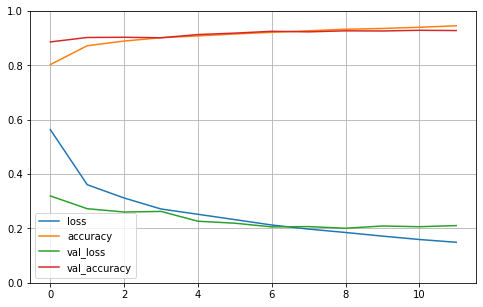

In [73]:
pd.DataFrame(history11.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [74]:
start_time = time.time()

score = model11.evaluate(x_test, y_test, verbose=0)
print('Test loss: {}'.format(score[0]))
print('Test accuracy: {}'.format(score[1]))

elapsed_time = time.time() - start_time
print("Elapsed time: {}".format(hms_string(elapsed_time)))

Test loss: 0.22938014566898346
Test accuracy: 0.9192000031471252
Elapsed time: 0:00:01.72


#### Optimizer 2 - Ftrl

In [77]:
batch_size2 = 32
epochs = 12
# 
model12 = Sequential()
model12.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model12.add(Conv2D(64, (3, 3), activation='relu'))
model12.add(MaxPooling2D(pool_size=(2, 2)))
model12.add(Dropout(0.25))
model12.add(Flatten())
model12.add(Dense(128, activation='relu'))
model12.add(Dropout(0.5))
model12.add(Dense(num_classes, activation='softmax'))
model12.compile(loss='categorical_crossentropy', optimizer='ftrl',
              metrics=['accuracy'])

In [78]:
start_time = time.time()
history12 = model12.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=2,
          validation_split=0.1)



elapsed_time = time.time() - start_time
print("Elapsed time: {}".format(hms_string(elapsed_time)))

Epoch 1/12
359/359 - 36s - loss: 2.3026 - accuracy: 0.0973 - val_loss: 2.3026 - val_accuracy: 0.0975
Epoch 2/12
359/359 - 36s - loss: 2.3026 - accuracy: 0.0994 - val_loss: 2.3026 - val_accuracy: 0.0975
Epoch 3/12
359/359 - 36s - loss: 2.3026 - accuracy: 0.1002 - val_loss: 2.3026 - val_accuracy: 0.0975
Epoch 4/12
359/359 - 36s - loss: 2.3026 - accuracy: 0.1011 - val_loss: 2.3026 - val_accuracy: 0.0975
Epoch 5/12
359/359 - 36s - loss: 2.3026 - accuracy: 0.1011 - val_loss: 2.3026 - val_accuracy: 0.0975
Epoch 6/12
359/359 - 36s - loss: 2.3026 - accuracy: 0.1011 - val_loss: 2.3026 - val_accuracy: 0.0975
Epoch 7/12
359/359 - 36s - loss: 2.3026 - accuracy: 0.1011 - val_loss: 2.3026 - val_accuracy: 0.0975
Epoch 8/12
359/359 - 36s - loss: 2.3026 - accuracy: 0.1011 - val_loss: 2.3026 - val_accuracy: 0.0975
Epoch 9/12
359/359 - 36s - loss: 2.3026 - accuracy: 0.1011 - val_loss: 2.3026 - val_accuracy: 0.0975
Epoch 10/12
359/359 - 36s - loss: 2.3026 - accuracy: 0.1011 - val_loss: 2.3026 - val_accura

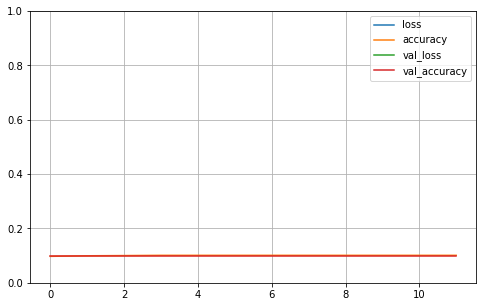

In [79]:
pd.DataFrame(history12.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [80]:
start_time = time.time()

score = model12.evaluate(x_test, y_test, verbose=0)
print('Test loss: {}'.format(score[0]))
print('Test accuracy: {}'.format(score[1]))

elapsed_time = time.time() - start_time
print("Elapsed time: {}".format(hms_string(elapsed_time)))

Test loss: 2.3025894165039062
Test accuracy: 0.10000000149011612
Elapsed time: 0:00:01.71


###### Optimizer comparison

The Main model has adam as optimizer. The test results are repeated here for the batch_size 32:
    Test loss: 0.256626158952713 = ca 0,257
    Test accuracy: 0.916700005531311 = ca 0,917

The second run comparing optimizers were run with the nadam. Nadam is adam with Nesterov momentum acceleration gradient method, which often makes it converge faster. 
Looking at the loss/accuracy curve, the Nadam should probably be stopped after 8 or 9 epochs to avoid overfitting. On the other hand the main model should probably be stopped after 4 or 5 epochs. 
    Test loss: 0.22938014566898346 = ca 0,229
    Test accuracy: 0.9192000031471252 = ca 0,919

The second optimization that is compered here is the ftrl. It is choosen because reading about it, it was made for on-line learning. It would be interesting to se if it was gonna preforme or not.
Looking at the run, it failed totally.
    Test loss: 2.3025894165039062 = ca 2,30
    Test accuracy: 0.10000000149011612 = ca 0,10

The Ftrl optimizer is obviously not fit for image recognition



#### Missclassification

In [84]:
from sklearn import metrics

small_x = x_test[1:100]
small_y = y_test[1:100]
small_y2 = np.argmax(small_y,axis=1)
pred = model.predict(small_x)
pred = np.argmax(pred,axis=1)
scoreX = metrics.accuracy_score(small_y2, pred)
print('Accuracy: {}'.format(scoreX))


Accuracy: 0.9090909090909091


In [116]:
from sklearn.metrics import classification_report

rounded_predictions = model.predict_classes(x_test, batch_size=128, verbose=0)
rounded_predictions[1]
print(rounded_predictions[1])

rounded_labels=np.argmax(y_test, axis=1)
print(rounded_labels[1])

print('Classification Report')
target_names = ['0','1','2','3','4','5','6','7','8','9']
print(classification_report(rounded_labels, rounded_predictions, target_names=target_names))


2
2
Classification Report
              precision    recall  f1-score   support

           0       0.86      0.89      0.87      1000
           1       1.00      0.98      0.99      1000
           2       0.89      0.84      0.86      1000
           3       0.94      0.88      0.91      1000
           4       0.81      0.94      0.87      1000
           5       0.98      0.99      0.98      1000
           6       0.79      0.74      0.76      1000
           7       0.95      0.98      0.96      1000
           8       0.98      0.99      0.98      1000
           9       0.99      0.95      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



In [117]:
print('Confusion Matrix')
cm = confusion_matrix(rounded_labels, rounded_predictions)
print(cm)



Confusion Matrix
[[885   0  14   9   3   1  82   0   6   0]
 [  3 981   0   8   1   0   5   0   2   0]
 [ 19   0 837   6  93   0  44   0   1   0]
 [ 18   2  14 881  41   0  42   0   2   0]
 [  1   0  18  14 939   0  27   0   1   0]
 [  0   0   0   0   0 988   0   9   0   3]
 [103   0  50  15  88   0 737   0   7   0]
 [  0   0   0   0   0  11   0 978   0  11]
 [  3   0   3   1   1   1   1   3 987   0]
 [  1   0   0   0   0   7   0  38   0 954]]


#### Comment on missclassification
Label number 6 have the worst performance. It has the highest number of miss-predicted items, the precision is the lowest and the recall is the lowest

Next after is label number 4 and 0.

Label 6 are Shirts, 4 are coats and 0 are t-shirts. They are rather alike compared to a sandal, bag or ankle boot.


18
Image (#18): Which is labeled '6'


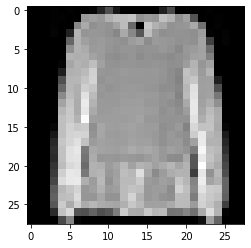

In [129]:
count = 0
labelnr = 6
while count <= 1000 and y_train0[count]!=labelnr  :
    count = count + 1
print (count)
a = x_train0[count]
plt.imshow(a, cmap='gray', interpolation='nearest')
print("Image (#{}): Which is labeled '{}'".format(count,y_train0[count]))

19
Image (#19): Which is labeled '4'


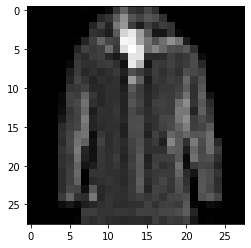

In [130]:
count = 0
labelnr = 4
while count <= 1000 and y_train0[count]!=labelnr  :
    count = count + 1
print (count)
b = x_train0[count]
plt.imshow(b, cmap='gray', interpolation='nearest')
print("Image (#{}): Which is labeled '{}'".format(count,y_train0[count]))

1
Image (#1): Which is labeled '0'


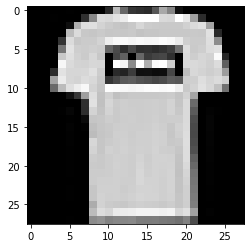

In [131]:
count = 0
labelnr = 0
while count <= 1000 and y_train0[count]!=labelnr  :
    count = count + 1
print (count)
c = x_train0[count]
plt.imshow(c, cmap='gray', interpolation='nearest')
print("Image (#{}): Which is labeled '{}'".format(count,y_train0[count]))

#### Comment2 on missclassification
Label 6 are Shirts have most problem with label 0 (82 items), 2 (44 items) and 3 (42 items)
Label 2 is just above. 2 and 3 are below
They are rather alike compared to shoes and bags

5
Image (#5): Which is labeled '2'


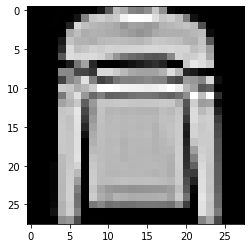

In [132]:
count = 0
labelnr = 2
while count <= 1000 and y_train0[count]!=labelnr  :
    count = count + 1
print (count)
c = x_train0[count]
plt.imshow(c, cmap='gray', interpolation='nearest')
print("Image (#{}): Which is labeled '{}'".format(count,y_train0[count]))

3
Image (#3): Which is labeled '3'


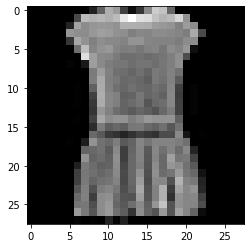

In [133]:
count = 0
labelnr = 3
while count <= 1000 and y_train0[count]!=labelnr  :
    count = count + 1
print (count)
c = x_train0[count]
plt.imshow(c, cmap='gray', interpolation='nearest')
print("Image (#{}): Which is labeled '{}'".format(count,y_train0[count]))